# Spectral Features

Spectral features are a set of audio features that are derived from the spectral representation of an audio signal. The spectral representation of an audio signal is obtained by applying the Fourier transform to the signal over short time windows. This results in a time-varying representation of the signal in the frequency domain, where the power spectral density of the signal at different frequencies and time points is computed.

The time-varying representation of the signal in the frequency domain means that the signal is analyzed over time at different frequencies. When an audio signal is transformed into the frequency domain using the Fourier transform, it becomes possible to see how much of the signal's energy is present at each frequency component.

In this time-varying representation, the power spectral density of the signal is computed for different frequencies and time points. Power spectral density refers to the distribution of the signal's power across different frequencies. So, for each small time window, the power spectral density is computed for each frequency, resulting in a time-varying representation of the signal in the frequency domain.

This representation allows for the extraction of various spectral features, which can be used to characterize different properties of the audio signal. By analyzing the spectral features over time, it is possible to gain insights into how the frequency content of the signal changes over time and how different events in the audio signal are related to changes in the spectral content.

In [31]:
import librosa
import librosa.feature
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def load_audio(audio_path):
    x, sr = librosa.load(audio_path)
    print(type(x), type(sr))
    print(x.shape, sr)

    return x, sr

In [33]:
base_path = './Data/genres_original'
file = 'reggae/reggae.00005.wav'
audio_path = f'{base_path}/{file}'
(y, sr) = load_audio(audio_path)

<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


## Chroma

Chroma refers to a set of features that capture the pitch content and harmonic structure of an audio signal. It is often used in music analysis and music information retrieval tasks.

The chroma features represent the distribution of energy in different pitch classes or musical notes. They are derived from the spectrogram of the audio signal, which is a visual representation of the signal's frequency content over time. The spectrogram is typically computed using the Fourier transform.

To compute chroma features, the spectrogram is divided into a set of frequency bands that correspond to different musical notes or pitch classes. The energy in each frequency band is then summed up to obtain the chroma feature values. This process is often performed using a filter bank or a set of cosine functions that are tuned to the desired pitch classes.

Chroma features are useful for tasks such as music genre classification, chord recognition, melody extraction, and audio similarity analysis. They provide a compact representation of the tonal content of an audio signal and can be used to capture musical aspects such as chord progressions and melodic patterns.

### Chromagrams

Chromagrams are a type of visualization that represents the chroma features of an audio signal. They provide a way to visualize the pitch content and harmonic structure of music or sound.

To create a chromagram, the audio signal is first transformed into a spectrogram using the Fourier transform. The spectrogram represents the signal's frequency content over time.

Next, the spectrogram is divided into frequency bands that correspond to different musical notes or pitch classes. These pitch classes are typically represented by 12 semitones in Western music, corresponding to the 12 notes in an octave.

For each time frame in the spectrogram, the energy or intensity in each pitch class is computed by summing the energy across the corresponding frequency band. These energies are then mapped onto a color scale to generate the chromagram. Each column in the chromagram represents a specific time frame, and each row represents a pitch class.

The resulting chromagram provides a visual representation of the presence and distribution of different musical notes or pitch classes over time. It can be used for tasks such as music transcription, chord recognition, and melody analysis, allowing for a more intuitive and concise representation of the underlying tonal information in the audio signal.

## Short-Time Fourier Transform (STFT)

A feature that represents the distribution of pitch classes in an audio signal. It is computed from the short-time Fourier transform (STFT) and can be used for tasks such as music genre classification and chord recognition.

In [34]:
librosa.feature.chroma_stft(y=y, sr=sr)

array([[0.35166004, 0.28422588, 0.24786304, ..., 0.5592603 , 0.37255338,
        0.78601134],
       [0.688377  , 0.8210777 , 1.        , ..., 0.5851438 , 0.30033076,
        0.64760494],
       [1.        , 1.        , 0.8437313 , ..., 0.7478237 , 0.47217178,
        0.7563511 ],
       ...,
       [0.8913222 , 0.58592093, 0.39343765, ..., 0.30214497, 0.2695208 ,
        0.492628  ],
       [0.84476644, 0.49521217, 0.36946237, ..., 0.29371986, 0.19176272,
        0.3627578 ],
       [0.2942005 , 0.19752395, 0.17520203, ..., 0.38606405, 0.20034434,
        0.47595617]], dtype=float32)

### Use an energy (magnitude) spectrum instead of power spectrogram

Using an energy (magnitude) spectrum instead of a power spectrogram means that instead of computing the power spectral density of the signal, the magnitude of the Short-Time Fourier Transform (STFT) is used.

The STFT of an audio signal is obtained by computing the Fourier transform of short time windows of the signal. The resulting STFT consists of a time-varying complex-valued matrix whose magnitude is commonly used to represent the energy of the signal at each frequency and time point.

In the following code snippet, the STFT of the audio signal 'y' is first computed using the librosa.stft() function, and the magnitude of the STFT is obtained using np.abs() function. Then, the chroma feature is computed from the magnitude spectrogram using the librosa.feature.chroma_stft() function.

The chroma feature is a type of spectral feature that represents the pitch content of the audio signal. It is computed by mapping the STFT magnitude to a chromatic scale, which groups nearby frequencies into semitone bins. The resulting chroma feature is a time-varying matrix whose columns represent different pitch classes (e.g., C, C#, D, D#, etc.) and whose values represent the energy of the audio signal in each pitch class at each time point.

Using the magnitude spectrogram instead of the power spectrogram can be beneficial in cases where only the relative magnitudes of different frequency components matter, and the exact power levels are less important. This approach can be particularly useful in music information retrieval tasks such as genre classification, chord recognition, and melody extraction.

In [35]:
mel_spectrogram = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=mel_spectrogram, sr=sr)
chroma

array([[0.53401726, 0.44683033, 0.4762849 , ..., 1.        , 0.96944803,
        1.        ],
       [0.81095344, 0.8673055 , 1.        , ..., 0.82923687, 0.66784894,
        0.730963  ],
       [0.8939466 , 1.        , 0.98646885, ..., 0.7671196 , 0.74128073,
        0.69876546],
       ...,
       [0.9064403 , 0.7782171 , 0.7482533 , ..., 0.79530054, 0.6618843 ,
        0.7130978 ],
       [1.        , 0.85159045, 0.8512415 , ..., 0.81082565, 0.5449006 ,
        0.61104953],
       [0.600064  , 0.48774683, 0.48289582, ..., 0.90396106, 0.61699885,
        0.68860346]], dtype=float32)

Use a pre-computed power spectrogram with a larger frame

In [36]:
mel_spectrogram = np.abs(librosa.stft(y, n_fft=4096)) ** 2
chroma = librosa.feature.chroma_stft(S=mel_spectrogram, sr=sr)
chroma

array([[0.3437655 , 0.29820922, 0.25112718, ..., 0.5173068 , 0.52142656,
        0.43685916],
       [0.86834407, 1.        , 1.        , ..., 0.708154  , 0.5378942 ,
        0.19122979],
       [1.        , 0.83408046, 0.62090695, ..., 0.83584964, 0.6369374 ,
        0.31624207],
       ...,
       [0.6932554 , 0.35709026, 0.07001977, ..., 0.47259486, 0.3459339 ,
        0.24859168],
       [0.5847085 , 0.3518466 , 0.18775363, ..., 0.35956472, 0.2758803 ,
        0.23984511],
       [0.21126698, 0.16427538, 0.14277802, ..., 0.39302167, 0.3452336 ,
        0.30430454]], dtype=float32)

### Plot Chroma_stft

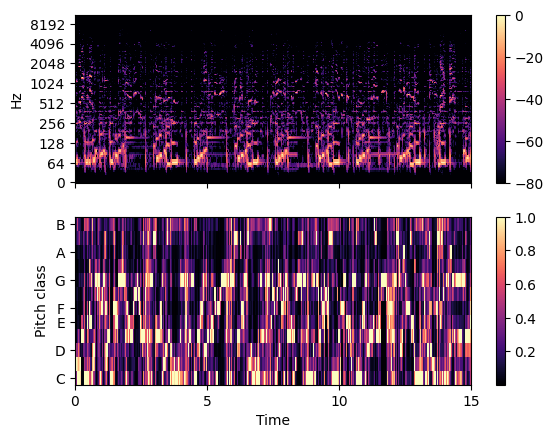

In [37]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(
    librosa.amplitude_to_db(mel_spectrogram, ref=np.max),
    y_axis='log',
    x_axis='time',
    ax=ax[0]
)
fig.colorbar(img, ax=[ax[0]])

ax[0].label_outer()

img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

## Constant-Q Transform (CQT)

Similar to chroma_stft, but computed using the constant-Q transform (CQT). It is more robust to tuning variations and can be used for music transcription.

In [38]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=4096)
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)

### Constant-Q Transform (CQT) vs Short-Time Fourier Transform (STFT)

The Constant-Q Transform (CQT) and Short-Time Fourier Transform (STFT) are both time-frequency analysis techniques commonly used in audio signal processing. While they share some similarities, they also have distinct characteristics that make them suitable for different applications. Let's delve deeper into the differences between CQT and STFT and discuss when to use each one:

#### Frequency Resolution:

*STFT*: The STFT provides a fixed frequency resolution throughout the entire spectrum. It divides the signal into overlapping frames and computes the Fourier Transform on each frame. As a result, the frequency resolution is constant across the entire frequency range.

*CQT*: The CQT offers a logarithmically spaced frequency resolution. It achieves this by dividing the signal into frames of varying width, with narrower frames at higher frequencies and wider frames at lower frequencies. This logarithmic spacing provides a more perceptually accurate representation of pitch perception and better aligns with the human auditory system.

#### Time-Frequency Trade-off:

*STFT*: The STFT provides good temporal resolution, meaning it can capture rapid changes in the signal over time. However, its frequency resolution is limited, especially for low frequencies. This trade-off makes the STFT well-suited for analyzing transient events or detecting short-term spectral changes.

*CQT*: The CQT sacrifices some temporal resolution to achieve better frequency resolution, particularly in the low-frequency range. It is suitable for tasks that require more accurate pitch estimation and harmonic analysis, where the temporal details are less important than the spectral characteristics.
Musical Pitch Analysis:

*STFT*: The STFT is often used for tasks that involve analyzing and processing audio signals in the context of musical pitch. It can capture the harmonic content of the signal, but its fixed frequency resolution may result in less accurate pitch estimation, especially for complex musical signals.

*CQT*: The CQT is particularly useful for tasks that require precise pitch analysis, such as melody extraction, chord recognition, or pitch tracking. Its logarithmic frequency resolution better aligns with the musical pitch scale, allowing for more accurate estimation of pitch and harmonic relationships.

#### Spectrogram Visualization:

*STFT*: The STFT spectrogram is commonly used for visualizing the spectral content of audio signals over time. It provides a straightforward representation where each pixel represents the magnitude of a specific frequency component at a particular time.

*CQT*: The CQT spectrogram offers a logarithmic frequency axis, which can be useful for visualizing pitch-related features. It can reveal the harmonic structure and tonal characteristics of the signal more intuitively than the linearly spaced frequency axis of the STFT spectrogram.

In summary, the choice between CQT and STFT depends on the specific application and the trade-off between temporal and frequency resolution. If accurate pitch analysis and harmonic information are crucial, the CQT is generally preferred. On the other hand, if capturing rapid temporal changes or processing transient events is the main objective, the STFT is a suitable choice.

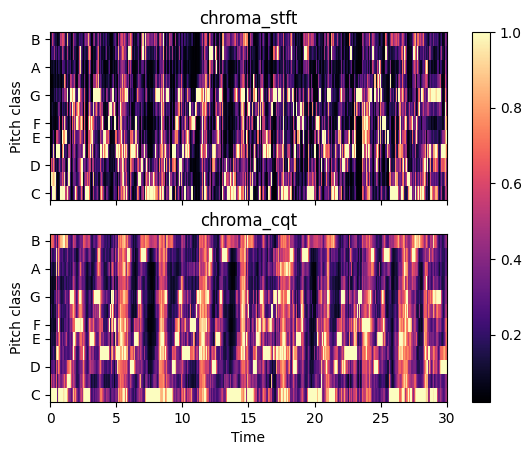

In [39]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()

img = librosa.display.specshow(chroma_cqt, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cqt')
fig.colorbar(img, ax=ax)

## Chroma Energy Normalized (CENS)

A variant of chroma_stft that is computed using a constant energy normalization scheme (CENS). It is more robust to variations in tempo and dynamics and can be used for music recommendation and retrieval.

In [40]:
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)

### Chroma Energy Normalized (CENS) vs Constant-Q Transform (CQT)

Chroma Energy Normalized (CENS) and Constant-Q Transform (CQT) are two different audio signal processing techniques commonly used in music analysis and audio feature extraction. While they serve similar purposes, there are distinct differences between them. Let's explore these differences and discuss when one might be preferred over the other.

#### Chroma Energy Normalized (CENS):
CENS is a method that computes a chroma-based representation of audio signals. It involves the following steps:
1. Convert the audio signal to the frequency domain using a Fast Fourier Transform (FFT).
2. Calculate the chroma features by mapping the frequencies to the nearest pitch classes.
3. Apply energy normalization to make the features more robust to variations in loudness and instrumentation.
4. CENS is particularly useful in music analysis tasks where the emphasis is on capturing the harmonic content and overall musical structure. By normalizing the energy, CENS can provide more stable representations that are less affected by volume variations.

#### Constant-Q Transform (CQT):
The CQT is a frequency analysis technique that aims to provide a more perceptually accurate representation of audio signals compared to the traditional FFT-based methods. It is characterized by the following features:
1. The CQT uses a logarithmic frequency spacing to mimic the human auditory system's response to pitch perception.
2. Unlike the FFT, which uses a fixed window size for all frequencies, the CQT employs different window sizes for different frequencies to achieve a constant ratio of frequency resolution across the spectrum.
3. The CQT is beneficial when the analysis requires a more detailed representation of audio signals, especially for tasks involving pitch detection, melody extraction, or audio synthesis. Due to its logarithmic frequency spacing and improved resolution at low frequencies, it is particularly suitable for capturing tonal information in music signals.

#### When to use CENS or CQT:
The choice between CENS and CQT depends on the specific analysis goals and requirements. Here are some considerations:

CENS is generally more suitable when the focus is on capturing the overall harmonic structure and similarity between musical pieces. It can be useful for tasks like music genre classification, chord recognition, or music similarity comparison.

CQT is preferred when a more accurate representation of the audio signals' tonal content is needed. It is commonly used for tasks like pitch tracking, melody extraction, audio synthesis, or any analysis that requires precise frequency localization.

In summary, CENS is advantageous for capturing harmonic content and robustness to volume variations, while CQT provides a more perceptually accurate representation with improved frequency resolution. The choice between the two depends on the specific analysis objectives and the level of detail required for the task at hand.

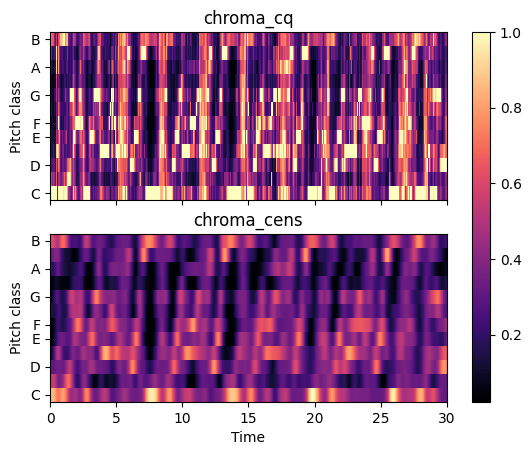

In [41]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img = librosa.display.specshow(chroma_cqt, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_cq')
ax[0].label_outer()

librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cens')
fig.colorbar(img, ax=ax)

## Variable-Q Chromagram

A variant of chroma_cqt that is computed using a variable-Q transform (VQT). It is more suitable for analyzing non-stationary signals, such as speech and environmental sounds.

In [42]:
n_bins = 36
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=n_bins)
chroma_vq = librosa.feature.chroma_vqt(y=y, sr=sr, intervals='ji5', bins_per_octave=n_bins)

### Variable-Q Chromagram and Constant-Q Transform (CQT)

The Variable-Q Chromagram and Constant-Q Transform (CQT) are both techniques used in audio signal processing, specifically for analyzing the spectral content of audio signals. While they share some similarities, there are key differences between them.

1. Frequency Resolution:
   - Variable-Q Chromagram: It uses a fixed time resolution and variable frequency resolution. This means that the frequency resolution varies across different frequency regions. It provides higher frequency resolution for lower frequencies and lower frequency resolution for higher frequencies.
   - CQT: It uses a constant frequency resolution and variable time resolution. This means that the frequency resolution remains constant across different frequency regions. It provides consistent frequency resolution throughout the entire frequency range.

2. Q-Factor:
   - Variable-Q Chromagram: The Q-factor (also known as the quality factor or bandwidth factor) can vary for each frequency bin. The Q-factor determines the width of each frequency bin.
   - CQT: The Q-factor is fixed and constant across all frequency bins. This ensures that the frequency resolution remains consistent throughout the analysis.

3. Applications:
   - Variable-Q Chromagram: It is commonly used in music information retrieval tasks such as chord recognition, key estimation, and music similarity analysis. The variable frequency resolution can be beneficial for capturing fine-grained details in music signals.
   - CQT: It is often used in tasks that require accurate pitch estimation, such as melody extraction and audio-to-MIDI conversion. The constant frequency resolution allows for precise identification of individual pitch components.

Choosing between Variable-Q Chromagram and CQT depends on the specific requirements of your audio analysis task. Consider the following factors:

- If you need consistent frequency resolution throughout the entire frequency range, and accurate pitch estimation is crucial, CQT is a better choice.
- If you require high frequency resolution for lower frequencies and lower frequency resolution for higher frequencies, and you are focusing on music information retrieval tasks, Variable-Q Chromagram may be more suitable.

It's worth noting that both techniques have their strengths and limitations, and the choice may also depend on the characteristics of the audio signals you are working with and the specific goals of your analysis.

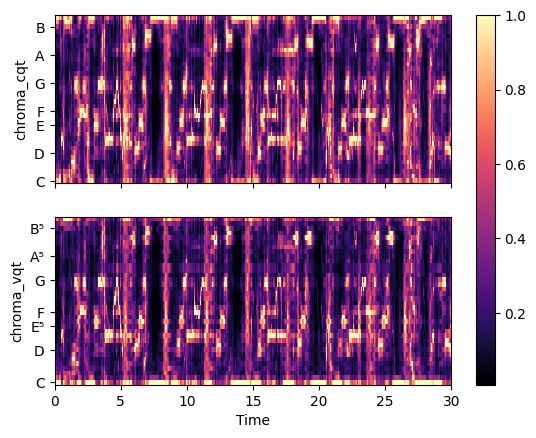

In [43]:
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(
    chroma_cq,
    y_axis='chroma',
    x_axis='time',
    ax=ax[0],
    bins_per_octave=n_bins
)

ax[0].set(ylabel='chroma_cqt')
ax[0].label_outer()
img = librosa.display.specshow(
    chroma_vq,
    y_axis='chroma_fjs',
    x_axis='time',
    ax=ax[1],
    bins_per_octave=n_bins,
    intervals='ji5'
)

ax[1].set(ylabel='chroma_vqt')
fig.colorbar(img, ax=ax)

## Melspectrogram

A feature that represents the power spectral density of an audio signal in the mel-scale. It is computed using a bank of mel filters and can be used for speech recognition, speaker identification, and music genre classification.

In [44]:
librosa.feature.melspectrogram(y=y, sr=sr)

array([[8.23457909e+00, 2.75434995e+00, 5.25314212e-01, ...,
        3.69490552e+00, 3.35993600e+00, 1.68958104e+00],
       [7.79759521e+01, 1.76643066e+02, 1.98131134e+02, ...,
        1.08242882e+02, 2.15604210e+01, 4.97887468e+00],
       [8.20006561e+01, 1.89579605e+02, 2.03072540e+02, ...,
        3.21736603e+02, 4.44951973e+01, 1.30579987e+01],
       ...,
       [1.34694186e-04, 3.70132766e-05, 2.74909121e-06, ...,
        7.28950113e-07, 4.99077714e-07, 2.13573203e-05],
       [1.14328315e-04, 2.81720277e-05, 1.43443387e-07, ...,
        6.31860004e-08, 3.95949286e-07, 2.03930067e-05],
       [1.09244284e-04, 2.68275817e-05, 1.45211647e-08, ...,
        1.09159242e-08, 3.79143160e-07, 1.98812268e-05]], dtype=float32)

### Using a pre-computed power spectrogram would give the same result:

In [46]:
S = np.abs(librosa.stft(y)) ** 2
mel_spectrogram = librosa.feature.melspectrogram(S=S, sr=sr)
mel_spectrogram

array([[8.23457909e+00, 2.75434995e+00, 5.25314212e-01, ...,
        3.69490552e+00, 3.35993600e+00, 1.68958104e+00],
       [7.79759521e+01, 1.76643066e+02, 1.98131134e+02, ...,
        1.08242882e+02, 2.15604210e+01, 4.97887468e+00],
       [8.20006561e+01, 1.89579605e+02, 2.03072540e+02, ...,
        3.21736603e+02, 4.44951973e+01, 1.30579987e+01],
       ...,
       [1.34694186e-04, 3.70132766e-05, 2.74909121e-06, ...,
        7.28950113e-07, 4.99077714e-07, 2.13573203e-05],
       [1.14328315e-04, 2.81720277e-05, 1.43443387e-07, ...,
        6.31860004e-08, 3.95949286e-07, 2.03930067e-05],
       [1.09244284e-04, 2.68275817e-05, 1.45211647e-08, ...,
        1.09159242e-08, 3.79143160e-07, 1.98812268e-05]], dtype=float32)

### Display of mel-frequency spectrogram coefficients, with custom arguments for mel filterbank construction (default is fmax=sr/2):

A mel-frequency spectrogram is a representation of an audio signal in which the frequency axis is divided into mel-scale bins. The mel scale is a perceptual scale of pitches that approximates the human ear's response to different frequencies.

In the code, the librosa.feature.melspectrogram() function is used to compute the mel spectrogram coefficients. Here's a breakdown of the function arguments:

y: The audio signal. This is the input audio waveform.
sr: The sampling rate of the audio signal, which specifies the number of samples per second. It indicates the resolution of the audio signal.
n_mels: The number of mel bins to generate. In this case, it is set to 128, which means the frequency axis will be divided into 128 mel-scale bins.
fmax: The maximum frequency to include in the mel spectrogram. By default (fmax=sr/2), it is set to half of the sampling rate, which is commonly used to avoid aliasing. However, in this code, it is set explicitly to 8000, which means only frequencies up to 8000 Hz will be included in the mel spectrogram.

The output of this code is the mel-frequency spectrogram coefficients stored in the variable S. These coefficients represent the energy distribution in each mel bin over time, providing a compact representation of the audio signal's spectral content.

In [47]:
# Passing through arguments to the Mel filters
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                                 fmax=8000)
mel_spectrogram

array([[6.60424519e+00, 2.44196105e+00, 4.44108665e-01, ...,
        2.22848558e+00, 2.08573008e+00, 1.45427048e+00],
       [5.85866699e+01, 1.12118652e+02, 1.21048080e+02, ...,
        6.81071472e+01, 1.90451603e+01, 3.56912589e+00],
       [1.04414764e+02, 2.70604340e+02, 3.05053467e+02, ...,
        2.98459137e+02, 3.75544167e+01, 1.29843044e+01],
       ...,
       [1.15830395e-02, 1.23219751e-02, 5.83219435e-03, ...,
        7.41364341e-03, 2.88699754e-04, 1.74905319e-04],
       [7.26766558e-03, 6.13760529e-03, 4.29392280e-03, ...,
        1.53967971e-02, 5.74021484e-04, 1.88538470e-04],
       [1.66533720e-02, 1.74812637e-02, 1.08623253e-02, ...,
        6.33685105e-03, 5.72641671e-04, 3.01502645e-04]], dtype=float32)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

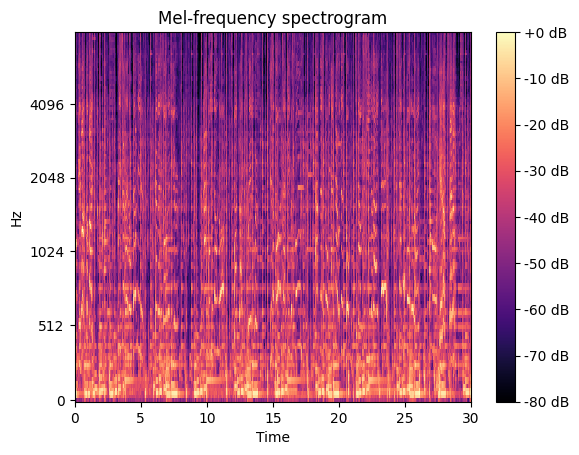

In [48]:
fig, ax = plt.subplots()
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
img = librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

## MFCC

Mel-frequency cepstral coefficients are a feature that represents the spectral envelope of an audio signal. They are computed by taking the logarithm of the mel-spectrum and applying a discrete cosine transform (DCT). They are commonly used for speech recognition and speaker identification.

## RMS

Root mean square is a feature that represents the overall energy of an audio signal. It is computed as the square root of the average of the squared amplitude values and can be used for audio level normalization and loudness measurement.

## Spectral_centroid

A feature that represents the center of mass of the spectral distribution of an audio signal. It is computed as the weighted mean of the frequency values and can be used for timbre analysis and music genre classification.

## Spectral_bandwidth

A feature that represents the width of the spectral distribution of an audio signal. It is computed as the second central moment of the frequency values and can be used for timbre analysis and music genre classification.

## Spectral_contrast

A feature that represents the difference in energy between adjacent frequency bands of an audio signal. It is computed by dividing the spectrum into sub-bands and computing the difference between the maximum and minimum energy values in each band. It can be used for music genre classification and speech recognition.

## Spectral_flatness

A feature that represents the tonality of an audio signal. It is computed as the ratio between the geometric mean and the arithmetic mean of the power spectral density and can be used for music genre classification and instrument recognition.

## Spectral_rolloff

A feature that represents the frequency below which a certain percentage of the spectral energy of an audio signal is contained. It is computed as the frequency at which the cumulative sum of the spectral energy reaches a certain threshold and can be used for speech recognition and music genre classification.

## Poly_features

A feature that represents the coefficients of a polynomial fit to the magnitude spectrum of an audio signal. It is computed using linear regression and can be used for speech recognition and music genre classification.

## Tonnetz

A feature that represents the harmonic relationships between pitch classes in an audio signal. It is computed using a graph-based representation and can be used for music analysis and chord recognition.